In [43]:
import pandas as pd
import matplotlib.pyplot as  plt
import  seaborn as sns 

In [44]:
df=pd.read_csv(r"C:\Users\yoges\Downloads\telco.csv")
df.head(15)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Stayed
1,1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,Stayed
2,2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churned
3,3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Stayed
4,4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Churned
5,5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Churned
6,6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,Stayed
7,7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,Stayed
8,8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Churned
9,9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,Stayed


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [46]:
df.describe()

,Unnamed: 0,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,3521.000000,32.371149,64.761692
std,2033.283305,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,1760.500000,9.000000,35.500000
50%,3521.000000,29.000000,70.350000
75%,5281.500000,55.000000,89.850000
max,7042.000000,72.000000,118.750000


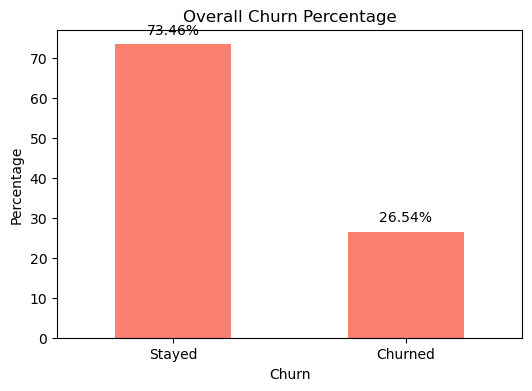

In [104]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
ax = churn_rate.plot(kind='bar', color='salmon', figsize=(6, 4))

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title('Overall Churn Percentage')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


Insight: Around 26.54% of customers in this dataset have churned (stopped using the service), while 73.46% have remained loyal.

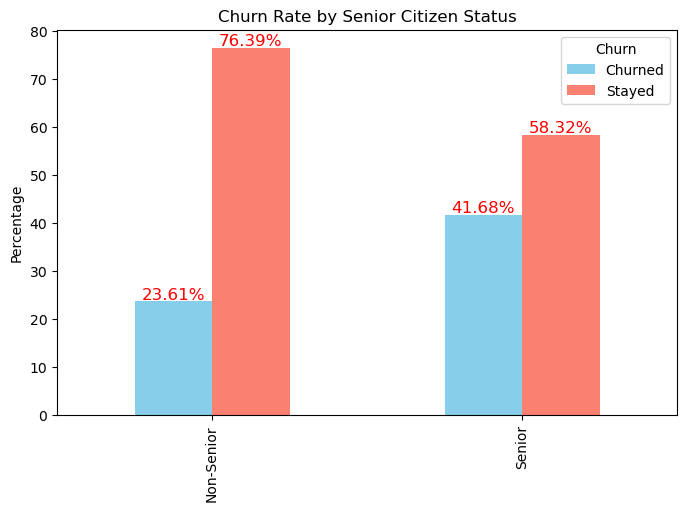

In [106]:
senior_churn_percent = senior_churn.div(senior_churn.sum(axis=1), axis=0) * 100
ax = senior_churn_percent.plot(kind='bar', stacked=False, figsize=(8, 5), color=['skyblue', 'salmon'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                fontsize=12, color='red', 
                xytext=(0, 5), textcoords='offset points')
ax.set_ylabel('Percentage')
ax.set_title('Churn Rate by Senior Citizen Status (%)')
plt.title('Churn Rate by Senior Citizen Status')
plt.show()

Insights: Seniors churn more (41.68%) than non-seniors (23.61%), indicating age is a churn risk factor.

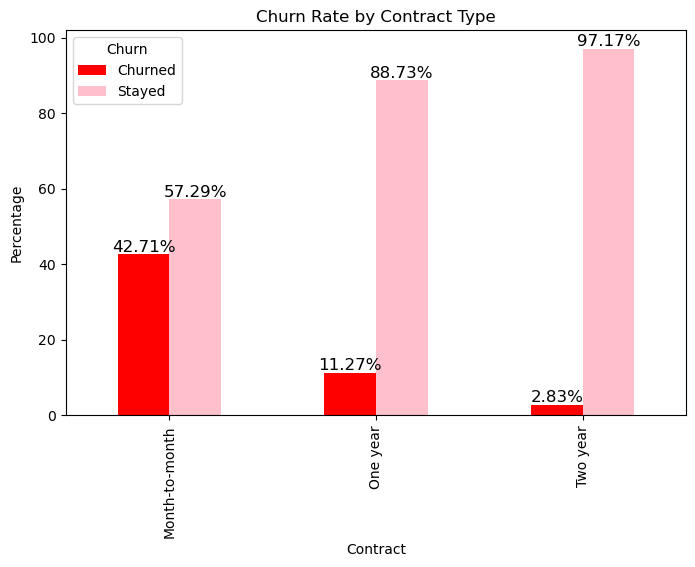

In [107]:
contract_churn_percent = contract_churn * 100
ax = contract_churn_percent.plot(kind='bar', stacked=False, figsize=(8, 5), color=['red', 'pink'])


plt.title('Churn Rate by Contract Type')
plt.ylabel('Percentage')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()


Insight: Month-to-month users have the highest churn (43%), while churn drops significantly with one-year (11%) and two-year (3%) contracts.

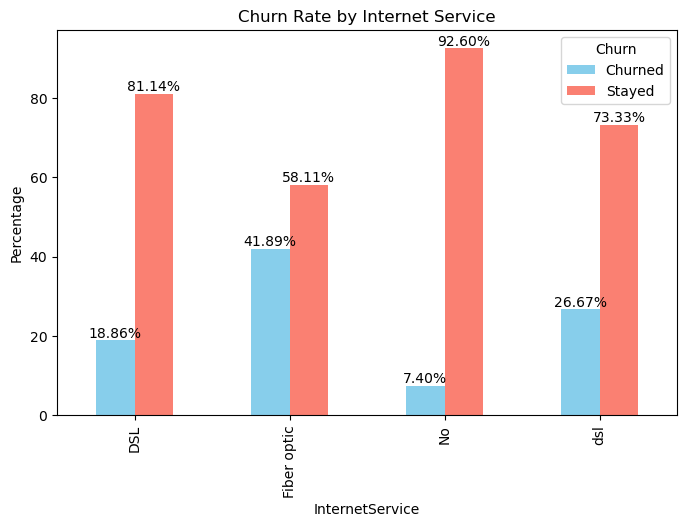

In [108]:
internet_churn_percent = internet_churn * 100
ax = internet_churn_percent.plot(kind='bar', stacked=False, figsize=(8, 5), color=['skyblue', 'salmon'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')
plt.title('Churn Rate by Internet Service')
plt.ylabel('Percentage')
plt.show()


Insight:Fiber optic users have the highest churn (42%), while those without internet rarely churn (~7%).

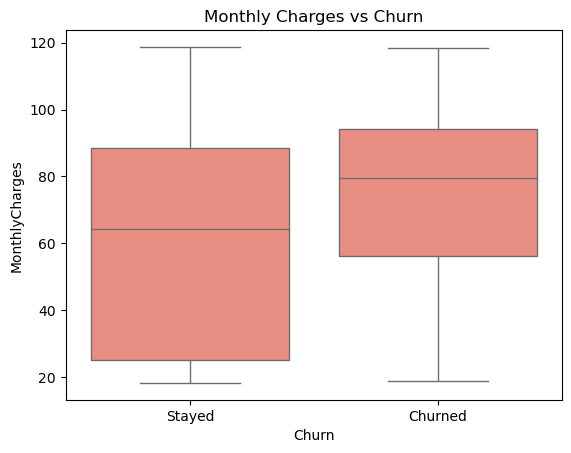

In [88]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df,color="salmon")
plt.title('Monthly Charges vs Churn',)
plt.show()


Insight: Customers who churn pay higher monthly charges on average compared to those who stay.

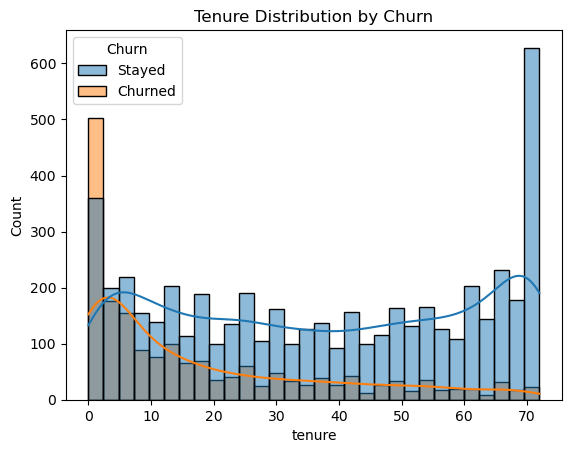

In [89]:
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
plt.title("Tenure Distribution by Churn")
plt.show()


Insight: Most churn happens early in the customer lifecycle, especially in the first 10 months.

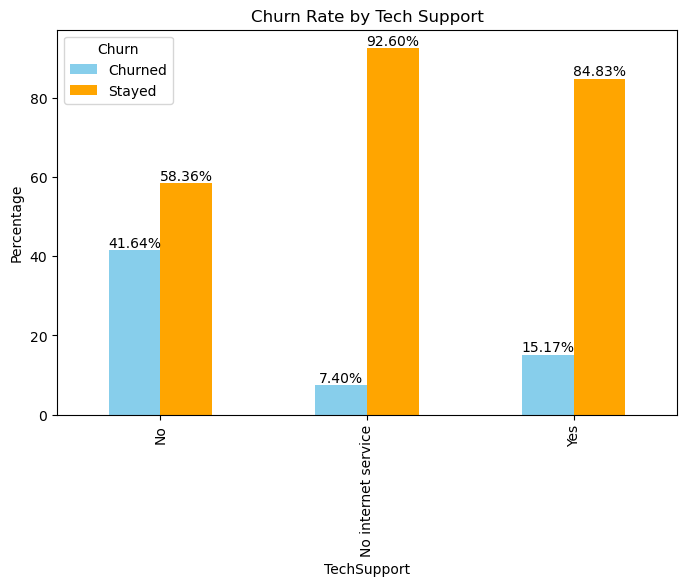

In [109]:
techsupport_churn_percent = techsupport_churn * 100
ax = techsupport_churn_percent.plot(kind='bar', stacked=False, figsize=(8, 5), color=['skyblue', 'orange'])


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title('Churn Rate by Tech Support')
plt.ylabel('Percentage')
plt.show()


INSIGHT: Customers without tech support churn more (42%), while those with support have lower churn (15%).

In [ ]:
CONCLUSION:
--> Overall churn rate is 26.5%
--> Senior citizens and customers with month-to-month contracts are most likely to churn.
--> Fiber optic users show higher churn, possibly due to pricing or performance issues.
--> High Monthly Charges correlate with higher churn.
--> Customers with short tenure are at greater risk—onboarding matters!
--> Tech support dramatically reduces churn.